# 1200546
# Faris Abu Farha

In [1]:
! pip install -U datasets transformers[torch] evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [2]:
from datasets import load_dataset
dataset = load_dataset('MrbBakh/Sentiment140')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/40000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

## 1.2.1 Text Pre-processing
Using the NLTK package for text pre-processing, start by tokenizing the text:

In [3]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
def tokenize(row):
  tokens = word_tokenize(row['text'])
  # to lowercase and remove punctuation
  tokens = [token.lower() for token in tokens if token.isalpha()]

  return {
    'tokens': tokens
  }
dataset = dataset.map(tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [4]:
from nltk.corpus import stopwords
nltk.download('stopwords')
def remove_stopwords(row):
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in row['tokens'] if token not in stop_words]

  return {

    'tokens': tokens
  }
dataset = dataset.map(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Parameter 'function'=<function remove_stopwords at 0x7f1dc8c6f2e0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Task 1 : Use PorterStemmer from NLTK to stem the tokens.

1


In [5]:
nltk.download('punkt')
from nltk.stem import PorterStemmer

def stem(row):

  porter = PorterStemmer()
  stemmed_tokens = [porter.stem(token) for token in row['tokens']]
  return {
    'tokens': stemmed_tokens
  }

dataset = dataset.map(stem)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

## 1.2.2 Word Embedding
Now that you have pre-processed tokens, use those to train the embedding model.Word2Vec
model from gensim is to be used in this experiment:

In [6]:
from gensim.models import Word2Vec
word_embedding = Word2Vec(dataset['train']['tokens'], vector_size=100,
                          min_count=1, window=5, sg=1, hs=0, negative=10)
word_embedding.save('w2v.model')
word_embedding = Word2Vec.load('w2v.model')


## 1.2.3 Average Vector
The first model would be an Average Vector model. A Naive Bayes classifier is going
to accept the average vector as input in order to classify samples into positive or
negative sentiments.

In [7]:
def filter_tokens(example):


  return {
  'tokens': [token for token in example['tokens'] if token in
  word_embedding.wv]
}

def mean_vector(example):


  return {
    'mean': word_embedding.wv[example['tokens']].mean(axis=0)
  }

dataset = dataset.map(filter_tokens) \
.filter(lambda e: len(e['tokens']) > 0) \
.map(mean_vector)

Map:   0%|          | 0/40000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/40000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Filter:   0%|          | 0/5000 [00:00<?, ? examples/s]

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4963 [00:00<?, ? examples/s]

Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

The filter tokens function would return only the tokens that do have embed-
dings in the trained Word2Vec model. After that, samples that do not contain any
valid token are filtered out. Then the mean vector function would return the average
of tokens’ vectors for each sample.
Finally, train the Naive Bayes classifier:

In [8]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
X = np.array(dataset['train']['mean'])
y = np.array(dataset['train']['sentiment'])
clf = GaussianNB()
clf.fit(X, y)

GaussianNB()

Task 2 : Compute the accuracy and the confusion matrix of the trained classifier on the test dataset.

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


X_test = np.array(dataset['test']['mean'])
y_test = np.array(dataset['test']['sentiment'])
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)




Accuracy: 0.6671365283930729
Confusion Matrix:
[[2072  498]
 [1155 1241]]


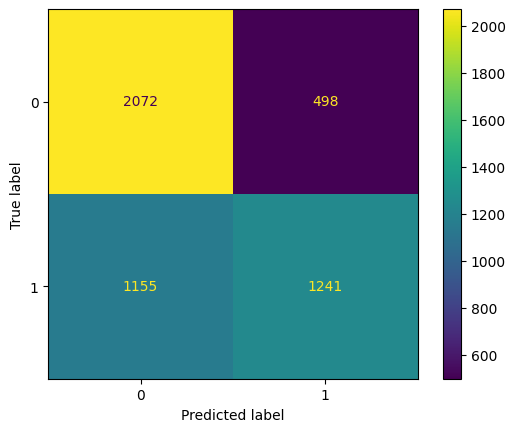

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## 1.2.4 LSTM
In this section, LSTM is to be used instead of feeding the average vector to a Naive
Bayes classifier.
LSTM in PyTorch is a module that accepts a tensor of shape L × V , where L is
the sequence length and V is the token vector length. LSTM module would consume
each sequence element xt , along with the previous hidden state (ht−1 , ct−1 ) and output
ot−1 , to produce the hidden state (ht , ct ) and output ot . As a result, the output of
the entire sequence would be of shape L × H where H is the hidden size.
Let’s first convert the tokens to the corresponding vectors using the trained
Word2Vec model.

In [11]:
def vectorize(example):

  return {
  'vectors': word_embedding.wv[example['tokens']]
  }

dataset = dataset.map(vectorize)

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4963 [00:00<?, ? examples/s]

Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

Try the following LSTM module and notice the output shape. Check the shape
of the input as well.

In [12]:
import torch
import torch.nn as nn
lstm = nn.LSTM(100, 200)

sequence = torch.tensor(dataset['train'][0]['vectors'])

out, _ = lstm(sequence)

Note: for batched input with batch size being N , LSTM would expect input as
L × N × V , and outputs the shape L × N × H. To avoid that, use batch first=True
and then the input would be N × L × V and the output would be N × L × H.
To define and use a 2-layers LSTM that accepts a batched input:

In [13]:
lstm = nn.LSTM(100, 200, 2, batch_first=True)
batch = [torch.tensor(sequence) for sequence in
dataset['train'][0:4]['vectors']]
padded_batch = nn.utils.rnn.pad_sequence(batch)
out, _ = lstm(padded_batch)

Task 3 : slice the output of the LSTM to get the last token’s output for every sample
in the batch.



In [14]:
# Extract the last token's output
last_token_output = out[:, -1, :]  # Shape: (batch_size, hidden_size)

print(last_token_output)



tensor([[ 0.0145, -0.0484,  0.0127,  ..., -0.0086, -0.0617,  0.0633],
        [ 0.0102, -0.0413,  0.0037,  ..., -0.0070, -0.0677,  0.0673],
        [ 0.0184, -0.0431,  0.0025,  ..., -0.0142, -0.0723,  0.0604],
        ...,
        [ 0.0194, -0.0521,  0.0257,  ..., -0.0089, -0.0614,  0.0606],
        [ 0.0157, -0.0512,  0.0211,  ..., -0.0093, -0.0556,  0.0635],
        [ 0.0206, -0.0555,  0.0270,  ..., -0.0104, -0.0581,  0.0602]],
       grad_fn=<SliceBackward0>)


In [15]:
def word_to_index(example):
  indices = [word_embedding.wv.key_to_index[token] for token in
  example['tokens']]
  return {
  'indices': indices
  }
dataset = dataset.map(word_to_index)

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4963 [00:00<?, ? examples/s]

Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

To accelerate the training, batches can be padded in order to be grouped in a
single tensor and moved to GPU at once. Define a padding vector, for example, the
zero vector, and give it the last index to avoid collision with other indices.

In [16]:
pad_vector = np.zeros(word_embedding.vector_size)
weights = np.vstack([word_embedding.wv.vectors, pad_vector])
vocab_size, embedding_size = weights.shape
pad_idx = vocab_size - 1

Now, pad the sequences. Arguments batched=True and batch size=None are
used to map all dataset samples at once, and with format(’torch’) is used to
ensure that the returning dataset is a PyTorch tensor.

In [17]:
def pad_sequences(batch):
  indices = [torch.tensor(sample, dtype=torch.long) for sample in
  batch['indices']]
  indices = nn.utils.rnn.pad_sequence(indices, batch_first=True,
  padding_value=pad_idx)
  return {
  'indices': indices
  }
dataset = dataset.map(pad_sequences, batched=True,
batch_size=None).with_format('torch')

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4963 [00:00<?, ? examples/s]

Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

Now, define the SentimentClassifierLSTM module using the Embedding followed
by the 2-layered LSTM. An extra fully connected layer (Linear) is used to project the
last token to a single element, followed by a to produce output between [0, 1].

In [18]:
import torch.nn.functional as F
class SentimentClassifierLSTM(nn.Module):
  def __init__(self, vocab_size, embedding_size, hidden_size, num_layers):
    super().__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.embedding = nn.Embedding(vocab_size, embedding_size)
    self.lstm = nn.LSTM(embedding_size, hidden_size, num_layers,
    batch_first=True)
    self.fc = nn.Linear(hidden_size, 1
                        )
  def forward(self, x):

    embeddings = self.embedding(x)
    out, _ = self.lstm(embeddings)
    out = out[:, -1, :]
    out = self.fc(out)
    out = F.sigmoid(out)
    return out.squeeze(1)

Define the model and fill the embedding layer, it’s important to set requires grad
to False for the embedding layer, as it’s pre-trained and shouldn’t be considered in
backpropagation and weights update.

In [19]:
hidden_size = 128
num_layers = 2

model = SentimentClassifierLSTM(vocab_size=vocab_size,
embedding_size=embedding_size, hidden_size=hidden_size, num_layers=num_layers)

model.embedding.weight = nn.Parameter(torch.FloatTensor(weights))
model.embedding.weight.requires_grad = False

In [20]:
learning_rate = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

Then move everything to GPU:

In [21]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

Define the dataloaders:

In [22]:
from torch.utils.data import DataLoader, TensorDataset
batch_size = 2048

def to_dataloader(dataset, split, shuffle):
  dataset = TensorDataset(dataset[split]['indices'],
  dataset[split]['sentiment'])
  return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

train_dataloader = to_dataloader(dataset, 'train', True)
test_dataloader = to_dataloader(dataset, 'test', False)
validation_dataloader = to_dataloader(dataset, 'validation', False)

Finally, define the training function:

In [23]:
def train_one_epoch(dataloader):
  for inputs, labels in dataloader:



    inputs = inputs.to(device)
    labels = labels.to(device).float()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Task 4 : Use the train one epoch to train the model on 20 epochs. Bonus: Evalu-
ate the model on the validation set after each epoch and print the validation accuracy.

Task 5 : Evaluate the model on the test set using the accuracy and confusion matrix.

Task 6 : Compare the performance of the model with the performance of the Average
Vector model.

Task 4: Use the train one epoch to train the model on 20 epochs. Bonus: Evaluate the model on the validation set after each epoch and print the validation accuracy



In [24]:
num_epochs = 20

for epoch in range(num_epochs):
    # Train one epoch

    train_one_epoch(train_dataloader)

    # Evaluate on validation set
    with torch.no_grad():
        model.eval()
        correct = 0
        total = 0
        for inputs, labels in validation_dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device).float()
            outputs = model(inputs)
            predicted = (outputs >= 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculate validation accuracy
        validation_accuracy = correct / total
        print(f'Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {validation_accuracy:.4f}')

    model.train()

Epoch [1/20], Validation Accuracy: 0.5342
Epoch [2/20], Validation Accuracy: 0.6480
Epoch [3/20], Validation Accuracy: 0.7012
Epoch [4/20], Validation Accuracy: 0.7024
Epoch [5/20], Validation Accuracy: 0.7111
Epoch [6/20], Validation Accuracy: 0.7238
Epoch [7/20], Validation Accuracy: 0.7264
Epoch [8/20], Validation Accuracy: 0.7187
Epoch [9/20], Validation Accuracy: 0.7252
Epoch [10/20], Validation Accuracy: 0.7278
Epoch [11/20], Validation Accuracy: 0.7246
Epoch [12/20], Validation Accuracy: 0.7149
Epoch [13/20], Validation Accuracy: 0.7338
Epoch [14/20], Validation Accuracy: 0.7322
Epoch [15/20], Validation Accuracy: 0.7375
Epoch [16/20], Validation Accuracy: 0.7354
Epoch [17/20], Validation Accuracy: 0.7379
Epoch [18/20], Validation Accuracy: 0.7385
Epoch [19/20], Validation Accuracy: 0.7175
Epoch [20/20], Validation Accuracy: 0.7399


Task 5: Evaluate the model on the test set using the accuracy and confusion matrix.



In [25]:
# Evaluate on test set
with torch.no_grad():
    model.eval()
    test_correct = 0
    test_total = 0
    test_predictions = []
    test_labels = []
    for inputs, labels in test_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device).float()
        outputs = model(inputs)
        predicted = (outputs >= 0.5).float()
        test_predictions.extend(predicted.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

    # Calculate test accuracy
    test_accuracy = test_correct / test_total
    print(f'Test Accuracy: {test_accuracy:.4f}')

    # Calculate confusion matrix
    from sklearn.metrics import confusion_matrix
    test_predictions = np.array(test_predictions)
    test_labels = np.array(test_labels)
    test_conf_matrix = confusion_matrix(test_labels, test_predictions)
    print("Confusion Matrix:")
    print(test_conf_matrix)

Test Accuracy: 0.7396
Confusion Matrix:
[[1927  643]
 [ 650 1746]]




LSTM Model: Like a thorough reading which captures detailed context and relationships, it  leads to higher accuracy but requires more trainning time.

Average Vector Model: Similar to a quick summary which averages the key points, It is faster and simpler but less accurate due to limited contextual understanding.

In short, the LSTM model offers greater accuracy with higher training time, while the Average Vector model is faster but less accurate.

## 1.2.5 Transformers
Transformer is a different architecture for sequence models. It’s the state-of-the-art
in NLP. Use the pre-trained BERT-mini model, which is available on HuggingFace
under ’lyeonii/bert-mini’.

Start by defining the tokenizer. The tokenizer is responsible for returning the
indices of the tokens. Use HuggingFace’s AutoTokenizer with the repository of the
model, and it will be able to return the appropriate tokenizer that suits the model:

In [26]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('lyeonii/bert-mini')

tokenizer_config.json:   0%|          | 0.00/361 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Then tokenize the dataset, the tokenizer will handle padding as well. Make sure
to set return tensors to ’pt’ which stands for PyTorch:

In [27]:
tokenized_dataset = dataset.map(lambda x: tokenizer(
x['text'],
padding=True,
return_tensors='pt'
), batched=True, batch_size=None).with_format('torch')

Map:   0%|          | 0/39924 [00:00<?, ? examples/s]

Map:   0%|          | 0/4963 [00:00<?, ? examples/s]

Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

HuggingFace models expect to receive the labels under the key ’labels’. Thus,
we need to rename the column ’sentiment’ in our dataset to be ’labels’.

In [28]:
tokenized_dataset = tokenized_dataset.rename_column('sentiment', 'labels')

Then load the model itself using AutoModelForSequenceClassification, similar
to AutoTokenizer:

In [29]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained('lyeonii/bert-mini',
num_labels=2)

config.json:   0%|          | 0.00/618 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/44.7M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at lyeonii/bert-mini and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Finally, use HuggingFace’s Trainer to train the model:

In [30]:
from transformers import TrainingArguments, Trainer
training_args = TrainingArguments(
output_dir='sentiment-analysis',
num_train_epochs=3,
per_device_train_batch_size=512,
per_device_eval_batch_size=512,
weight_decay=0.01,
evaluation_strategy='epoch',
save_strategy='epoch',
logging_strategy='epoch'
)
trainer = Trainer(
model=model,
args=training_args,
train_dataset=tokenized_dataset['train'],
eval_dataset=tokenized_dataset['validation']
)
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.595900,0.504801
2,0.487900,0.466793
3,0.461800,0.459818


TrainOutput(global_step=234, training_loss=0.5151918851412259, metrics={'train_runtime': 158.7336, 'train_samples_per_second': 754.547, 'train_steps_per_second': 1.474, 'total_flos': 370912765800960.0, 'train_loss': 0.5151918851412259, 'epoch': 3.0})

Task 7 : Use compute metrics in Trainer constructor, with evaluate package, to
compute validation accuracy.
Task 8 : Evaluate the model on the test set using the accuracy and confusion matrix.
Task 9 : Compare the model with the previously trained models.

Task 7

In [31]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='sentiment-analysis',
    num_train_epochs=3,
    per_device_train_batch_size=512,
    per_device_eval_batch_size=512,
    weight_decay=0.01,
    evaluation_strategy='epoch',
    save_strategy='epoch',
    logging_strategy='epoch'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['validation']
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,0.440100,0.454264
2,0.411000,0.442126
3,0.405100,0.441241


TrainOutput(global_step=234, training_loss=0.41872335906721586, metrics={'train_runtime': 165.8374, 'train_samples_per_second': 722.225, 'train_steps_per_second': 1.411, 'total_flos': 370912765800960.0, 'train_loss': 0.41872335906721586, 'epoch': 3.0})

Task 8

In [43]:
# Tokenize the test set if not already tokenized
# If the test set is not tokenized, tokenize it here


def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

test_dataset = dataset['test'].map(tokenize_function, batched=True)
test_dataset = test_dataset.rename_column('sentiment', 'labels')

# Evaluate the model using the test set
eval_results = trainer.predict(test_dataset)

# Extract predictions and labels
pred_logits = eval_results.predictions
pred_labels = np.argmax(pred_logits, axis=1)
true_labels = eval_results.label_ids

# Calculate accuracy
accuracy = np.mean(pred_labels == true_labels)
print("Test Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

Map:   0%|          | 0/4966 [00:00<?, ? examples/s]

Epoch,Training Loss,Validation Loss
0,No log,0.429834


Test Accuracy: 0.8093032621828433
Confusion Matrix:
[[2142  428]
 [ 519 1877]]


Task 9: Compare the model with the previously trained models.

In comparison with previous  models such as LSTM and Average Vector models, the BERT-based model for sentiment analysis showed a better performance with accuray score of 81%. BERT's transformer architecture enables it to capture intricate contextual information and complex language patterns effectively. Fine-tuning pre-trained BERT models for sentiment analysis tasks requires less data and time in comparision with training LSTM models from scratch. As a result, BERT achieves higher accuracy and better performance in sentiment analysis tasks, making it the preferred choice for such applications.